<font color="turquoise"> Andrea Zoccatelli - 2023
<br> "Augmentation of tabular data with continuous
features for binary imbalanced
classification problems"</font>

<h1>Datasets generation</h1>

In [1]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from imblearn.datasets import make_imbalance
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def neighbours(X, y):
    #fit KNN
    model = KNN(n_neighbors=5)
    model = model.fit(X = X.values, y = y)
    #consider only for minority obs
    pos_index = np.where(y == 1)
    X_pos = X.values[pos_index]
    #find neighbours
    nghbs = model.kneighbors(X_pos, return_distance=False)
    return nghbs

In [3]:
def look_nghbs(nghbs, y):
    #% of obs belonging to minority class among the 5 nearest neighbours
    l = []
    for c in range(len(nghbs)):
        l.append(sum(y[nghbs[c]])/5)
    l = np.array(l)
    tot = len(l)
    print(f'Safe: {sum((l==1)|(l==(4/5)))/tot}')
    print(f'Borderline: {sum((l==(3/5))|(l==(2/5)))/tot}')
    print(f'Rare: {sum(l==(1/5))/tot}')
    print(f'Outlier: {sum(l==(0))/tot}')

<h3>Best case</h3>

40-50% "Safe" observations among minority class, 20% minority, 2 features

In [6]:
X, y = make_classification(n_samples=500, n_features = 2, n_classes = 2, n_redundant=0, weights= [0.8, 0.2],
                           n_informative=2, flip_y=0, class_sep=0.35, hypercube=True, random_state=1)
X = pd.DataFrame(X, columns=["feature 1", "feature 2"])

In [7]:
nghbs = neighbours(X, y)
look_nghbs(nghbs, y)

Safe: 0.46
Borderline: 0.38
Rare: 0.16
Outlier: 0.0


In [8]:
X['y'] = y.astype(int)

[Text(0.5, 1.0, 'Best case')]

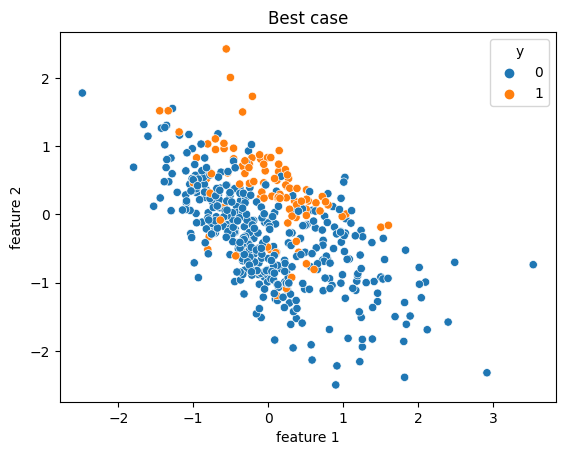

In [9]:
sns.scatterplot(data=X, x = "feature 1", y = "feature 2", hue="y").set(title = "Best case")

In [43]:
X.to_csv("BestCase.csv", index=False)

<h3>Different isolation levels</h3>

20-30% "Safe" observations

In [5]:
X, y = make_classification(n_samples=500, n_features = 2, n_classes = 2, n_redundant=0, weights= [0.8, 0.2],
                           n_informative=2, flip_y=0, class_sep=0.2, hypercube=True, random_state=1)
X = pd.DataFrame(X, columns=["feature 1", "feature 2"])

In [7]:
nghbs = neighbours(X, y)
look_nghbs(nghbs, y)

Safe: 0.26
Borderline: 0.51
Rare: 0.23
Outlier: 0.0


In [8]:
X['y'] = y.astype(int)

[Text(0.5, 1.0, '20-30% Safe')]

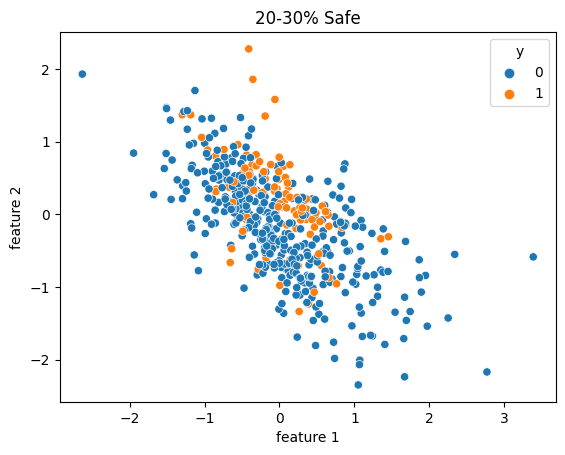

In [11]:
sns.scatterplot(data=X, x = "feature 1", y = "feature 2", hue="y").set(title = "20-30% Safe")

In [10]:
X.to_csv("20_30Safe.csv", index=False)

~20% or less "Safe" observations

In [4]:
X, y = make_classification(n_samples=500, n_features = 2, n_classes = 2, n_redundant=0, weights= [0.8, 0.2],
                           n_informative=2, flip_y=0, class_sep=0.18, hypercube=True, random_state=1)
X = pd.DataFrame(X, columns=["feature 1", "feature 2"])

In [5]:
nghbs = neighbours(X, y)
look_nghbs(nghbs, y)

Safe: 0.18
Borderline: 0.58
Rare: 0.24
Outlier: 0.0


In [6]:
X['y'] = y.astype(int)

[Text(0.5, 1.0, 'Less 20% Safe')]

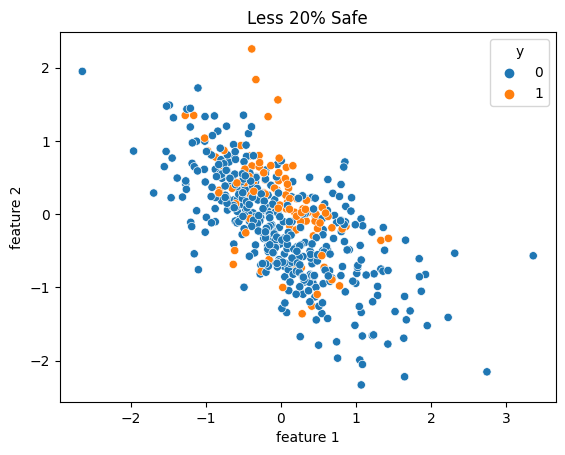

In [7]:
sns.scatterplot(data=X, x = "feature 1", y = "feature 2", hue="y").set(title = "Less 20% Safe")

In [8]:
X.to_csv("less20Safe.csv", index=False)

<h3>Different Minority % of total</h3>

10% minority

In [30]:
X, y = make_classification(n_samples=500, n_features = 2, n_classes = 2, n_redundant=0, weights= [0.9, 0.1],
                           n_informative=2, flip_y=0, class_sep=0.5, hypercube=True, random_state=1)
X = pd.DataFrame(X, columns=["feature 1", "feature 2"])

In [31]:
nghbs = neighbours(X, y)
look_nghbs(nghbs, y)

Safe: 0.4
Borderline: 0.34
Rare: 0.26
Outlier: 0.0


In [32]:
X['y'] = y.astype(int)

[Text(0.5, 1.0, '10% Minority Class')]

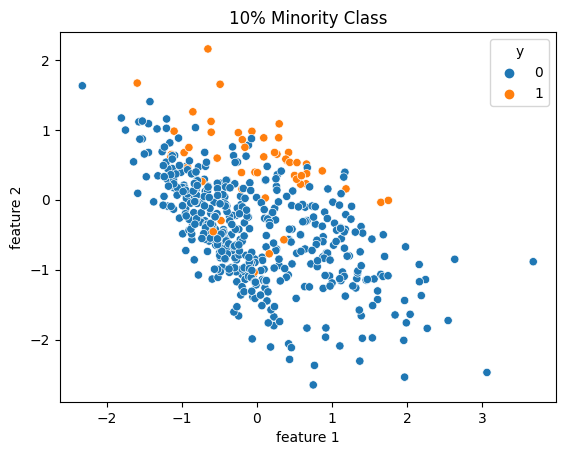

In [33]:
sns.scatterplot(data=X, x = "feature 1", y = "feature 2", hue="y").set(title = "10% Minority Class")

In [34]:
X.to_csv("10perc_minority.csv", index=False)

5% minority

In [48]:
X, y = make_classification(n_samples=500, n_features = 2, n_classes = 2, n_redundant=0, weights= [0.95, 0.05],
                           n_informative=2, flip_y=0, class_sep=0.52, hypercube=True, random_state=1)
X = pd.DataFrame(X, columns=["feature 1", "feature 2"])

In [49]:
nghbs = neighbours(X, y)
look_nghbs(nghbs, y)

Safe: 0.4
Borderline: 0.36
Rare: 0.24
Outlier: 0.0


In [50]:
X['y'] = y.astype(int)

[Text(0.5, 1.0, '5% Minority Class')]

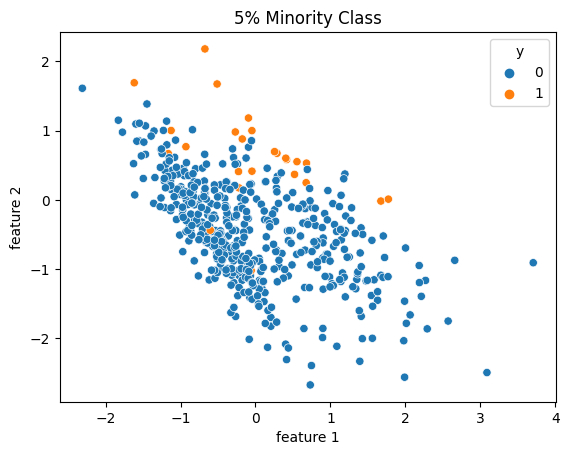

In [51]:
sns.scatterplot(data=X, x = "feature 1", y = "feature 2", hue="y").set(title = "5% Minority Class")

In [52]:
X.to_csv("5perc_minority.csv", index=False)

<h3>Different number of features</h3>

4

In [58]:
X, y = make_classification(n_samples=500, n_features = 4, n_classes = 2, n_redundant=0, weights= [0.8, 0.2],
                           n_informative=4, flip_y=0, class_sep=0.5, hypercube=True, random_state=1)
X = pd.DataFrame(X, columns=["feature 1", "feature 2", "feature 3", "feature 4"])

In [59]:
nghbs = neighbours(X, y)
look_nghbs(nghbs, y)

Safe: 0.46
Borderline: 0.38
Rare: 0.16
Outlier: 0.0


In [60]:
X['y'] = y.astype(int)

In [62]:
X.to_csv("4features.csv", index=False)

8

In [66]:
X, y = make_classification(n_samples=500, n_features = 8, n_classes = 2, n_redundant=0, weights= [0.8, 0.2],
                           n_informative=8, flip_y=0, class_sep=0.55, hypercube=True, random_state=1)
X = pd.DataFrame(X, columns=["feature 1", "feature 2", "feature 3", "feature 4",
                             "feature 5", "feature 6", "feature 7", "feature 8"])

In [67]:
nghbs = neighbours(X, y)
look_nghbs(nghbs, y)

Safe: 0.39
Borderline: 0.46
Rare: 0.15
Outlier: 0.0


In [68]:
X['y'] = y.astype(int)

In [69]:
X.to_csv("8features.csv", index=False)

<h3>Default</h3>

In [18]:
df = pd.read_csv('default.csv')
X = df.drop('y', axis = 1)
y = df['y']

min_total = df[df['y'] == 1].shape[0]
max_total = df[df['y'] == 0].shape[0]
min_perc = round((min_total/max_total)*100, 2)
nghbs = neighbours(X, y)
print(f'min total: {min_total}\nmax total: {max_total}\nmin percentage: {min_perc}')
look_nghbs(nghbs, y)

min total: 333
max total: 9667
min percentage: 3.44
Safe: 0.12312312312312312
Borderline: 0.45345345345345345
Rare: 0.42342342342342343
Outlier: 0.0


[Text(0.5, 1.0, 'Default')]

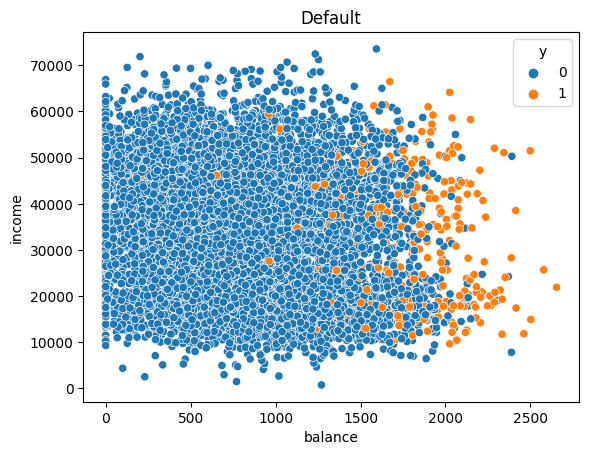

In [12]:
sns.scatterplot(data=df, x = "balance", y = "income", hue="y").set(title = "Default")